The goal of this notebook is to plot the various characteristics of the dataset and detect if any particular biais is present before doing any further testing on the tools and services themselves. 

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Getting the dataset

In [2]:
wikidata_df = pd.read_csv('../../data/Wikidata5k.csv')
kaggle_df = pd.read_csv('../../data/KaggleOlympic2024.csv')
master_df = pd.read_csv('../../data/all.csv')

# Gender distribution per dataset

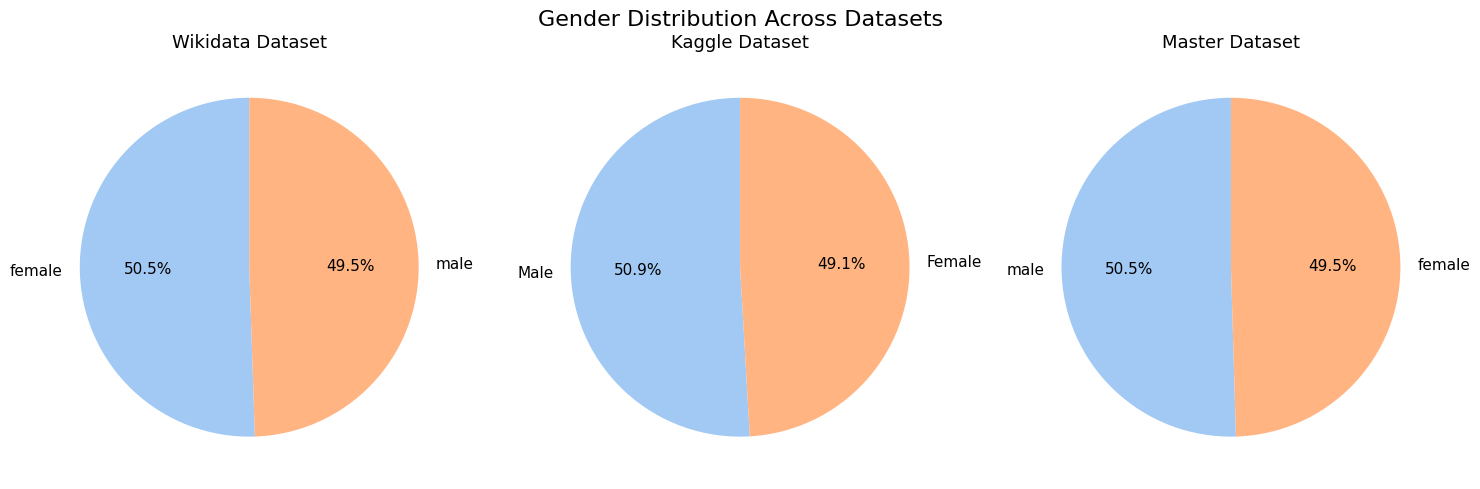

In [ ]:
datasets = {
    "Wikidata": wikidata_df['genders'],
    "Kaggle": kaggle_df['gender'],
    "Master": master_df['gender']
}

# Colors for consistency across plots
colors = sns.color_palette("pastel")[0:2]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, df) in zip(axes, datasets.items()):
    gender_counts = df.value_counts()
    ax.pie(gender_counts, 
           labels=gender_counts.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=colors,
           textprops={'fontsize': 11})
    ax.set_title(f"{name} Dataset", fontsize=13)

plt.suptitle("Gender Distribution Across Datasets", fontsize=16)
plt.tight_layout()
plt.show()  

# Continent representation per dataset

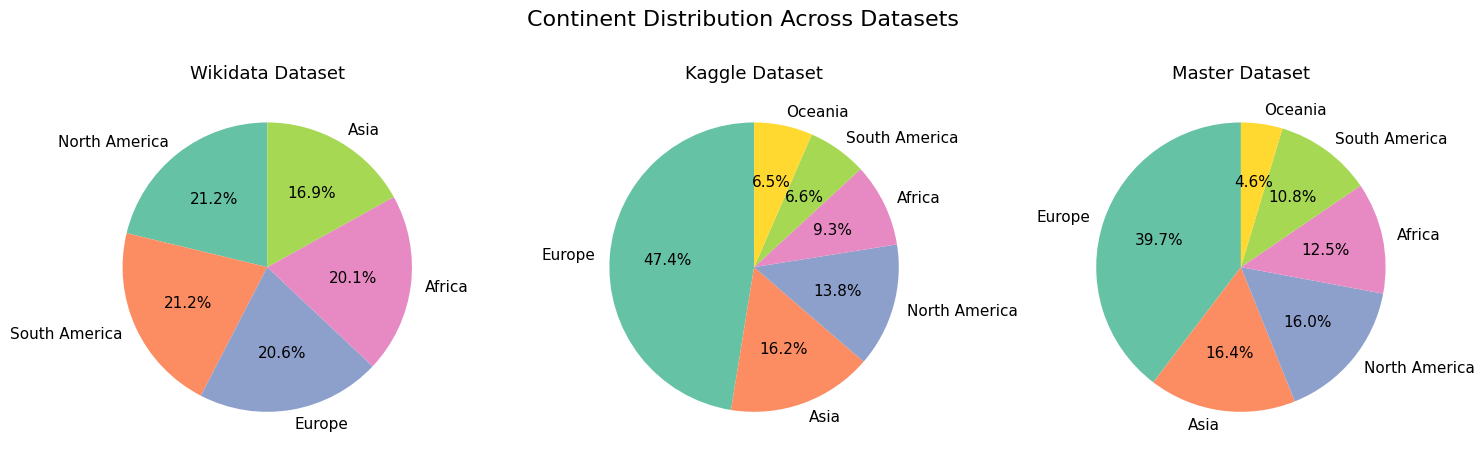

In [3]:
datasets = {
    "Wikidata": wikidata_df['continents'],
    "Kaggle": kaggle_df['continents'],
    "Master": master_df['continent']
}

colors = sns.color_palette("Set2", 6)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, df) in zip(axes, datasets.items()):
    gender_counts = df.value_counts()
    ax.pie(gender_counts, 
           labels=gender_counts.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=colors,
           textprops={'fontsize': 11})
    ax.set_title(f"{name} Dataset", fontsize=13)

plt.suptitle("Continent Distribution Across Datasets", fontsize=16)
plt.tight_layout()
plt.show()

# Age representation of the datasets

C:\Users\brief\AppData\Local\Temp\ipykernel_10804\1891739927.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  kaggle_df["birth_date"] = pd.to_datetime(kaggle_df["birth_date"], errors="coerce")


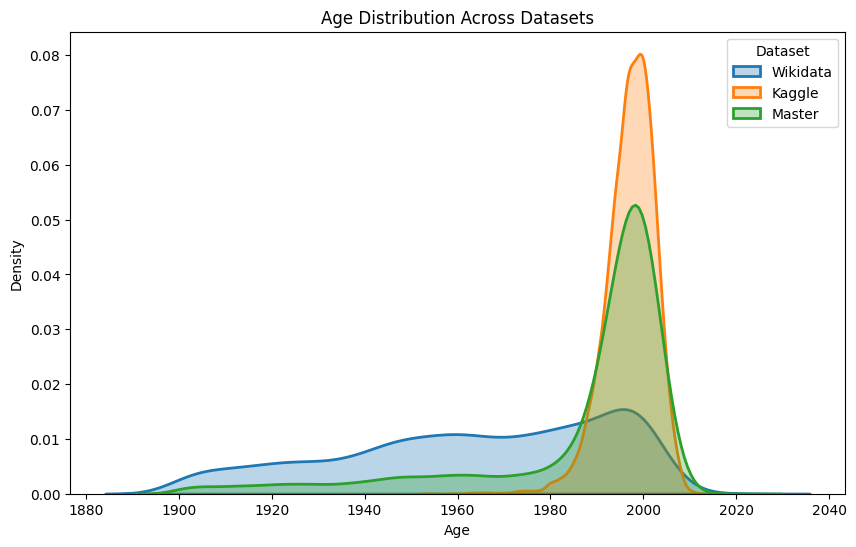

In [45]:
wikidata_df["dobs"] = pd.to_datetime(wikidata_df["dobs"], errors="coerce")
wikidata_df["birth_year"] = wikidata_df["dobs"].dt.year

kaggle_df["birth_date"] = pd.to_datetime(kaggle_df["birth_date"], errors="coerce")
kaggle_df["birth_year"] = kaggle_df["birth_date"].dt.year

datasets = {
    "Wikidata": wikidata_df['birth_year'],
    "Kaggle": kaggle_df['birth_year'],
    "Master": master_df['birthYear']
}

plt.figure(figsize=(10,6))

for name, df in datasets.items():
    sns.kdeplot(df, label=name, linewidth=2, fill=True, alpha=0.3)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution Across Datasets")
plt.legend(title="Dataset")
plt.show()